In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Import Library**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [26]:
df = pd.read_csv("gdrive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [33]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nTotal number of class: ", len(list(set(df['Class Name']))))

print("=======================================================================")

print("\nTotal number of unique products: ", len(list(set(df['Clothing ID']))))

print("=======================================================================")

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(df[df['Rating']==3]["Review Text"].count()/len(df)*100))

print("=======================================================================")

print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df[df['Rating']>3]["Review Text"].count()/len(df)*100))

print("=======================================================================")

print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['Rating']<3]["Review Text"].count()/len(df)*100))
print("=======================================================================")

Summary statistics of numerical features : 
          Unnamed: 0  Clothing ID  ...  Positive Feedback Count    Sentiment
count   1711.000000  1711.000000  ...              1711.000000  1711.000000
mean   11677.462887   925.073057  ...                 2.592636     0.868498
std     6776.483834   193.339416  ...                 5.554676     0.338047
min       18.000000    24.000000  ...                 0.000000     0.000000
25%     5765.000000   862.000000  ...                 0.000000     1.000000
50%    11733.000000   939.000000  ...                 1.000000     1.000000
75%    17755.500000  1078.000000  ...                 3.000000     1.000000
max    23476.000000  1205.000000  ...                87.000000     1.000000

[8 rows x 7 columns]

Total number of reviews:  1711

Total number of class:  18

Total number of unique products:  345

Percentage of reviews with neutral sentiment : 0.00%

Percentage of reviews with positive sentiment : 86.85%

Percentage of reviews with negative sen

**Visualisasi Data**

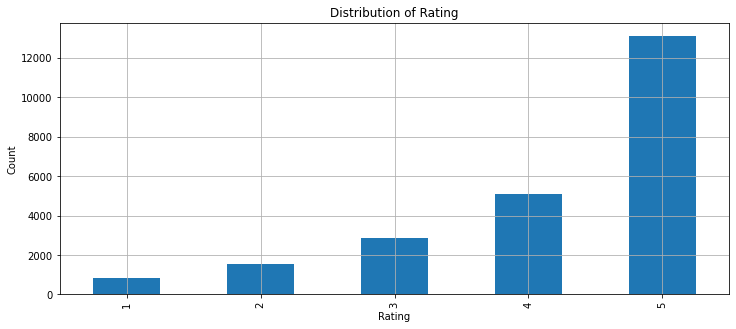

In [28]:
plt.figure(figsize=(12,5))
# sns.countplot(df['Rating'])
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("white")

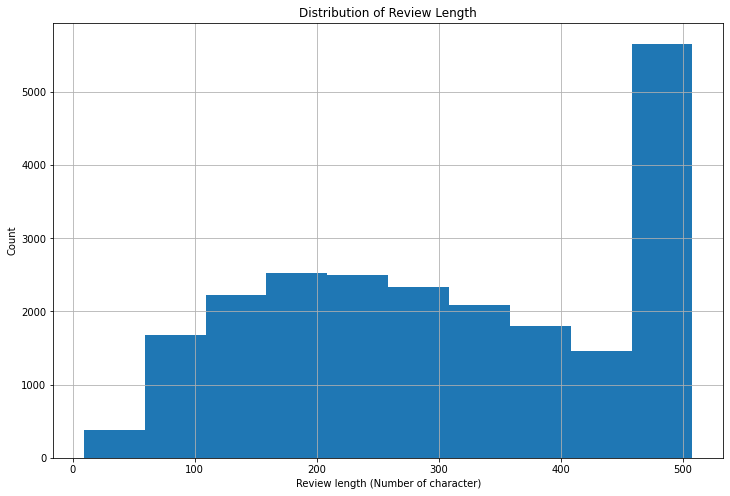

In [29]:
review_length = df["Review Text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("white")

**Data Preparation**

In [30]:
df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
12906,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets,1
22440,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits,1
13965,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits,1
19166,19166,1121,25,"Beautiful design, poor execution",I knew i needed to buy this trench from the mo...,1,0,4,General,Jackets,Outerwear,0
12522,12522,1059,25,Adorable on!!!,This is so cute with a shirt or tee under neat...,5,1,3,General,Bottoms,Pants,1


Positive reviews are 1711 and negative reviews are 0 of total 1711 


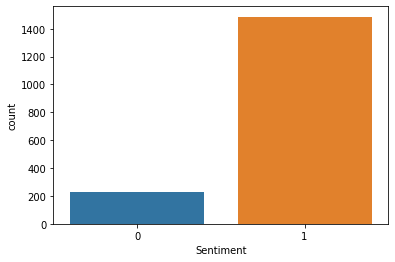

In [31]:
negative = len(df[df['Sentiment']=='positive'])
positive = len(df) - negative
sns.countplot(df['Sentiment'])
print('Positive reviews are {} and negative reviews are {} of total {} '.format(positive,negative,len(df)))

**Train Test Split**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'], df['Sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 1539 training examples and 172 validation examples. 

Show a review in the training set : 
 Got the small petite. length is perfect, love the color, super comfy, very pretty. the problem is that you cannot wear a bra because under the armpits is so low that either shows your bra (a lot) or if u wear sans bra you may show your breasts (it's loose all around on top, so very easy to show everything. if i adjust the straps it works but then the waist goes up and it looks like i have a belly. i'm taking to a seamstress to see if she can take in under armpits, if not it's going back. i'm 5',


(8218     I love how you can wear this with a t-shirt or...
 21721    I'm giving these leggings 5 stars although i d...
 14641    I love these shorts. love that the inseam is l...
 15902    This sweater vest is versatile and adorable --...
 20540    Quality jumpsuit but poor design. the green ma...
                                ...                        
 7955     This blouse has a nice casual feel with femini...
 4883     Love this white jean jacket! love the stretchy...
 13650    I purchased this dress as an easy option to th...
 18684    Looks cute on! not super form fitting... more ...
 1785     Love this shirt, very flattering fit on my pea...
 Name: Review Text, Length: 1539, dtype: object, 8218     1
 21721    1
 14641    1
 15902    1
 20540    0
         ..
 7955     1
 4883     1
 13650    1
 18684    1
 1785     1
 Name: Sentiment, Length: 1539, dtype: int64)

**Text Preprocessing**

In [12]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

**LSTM**

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
print("Training data size : ", train_df.shape)
print("Test data size : ", test_df.shape)

Training data size :  (1368, 12)
Test data size :  (343, 12)


In [17]:

top_words = 20000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(train_df['Review Text'])
list_tokenized_train = tokenizer.texts_to_sequences(train_df['Review Text'])

max_review_length = 200
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
y_train = train_df['Sentiment']

In [18]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           640032    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 693,333
Trainable params: 693,333
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
18/18 [==============================] - 8s 296ms/step - loss: 0.6172 - accuracy: 0.7860 - val_loss: 0.4057 - val_accuracy: 0.8577
Epoch 2/20
18/18 [==============================] - 5s 261ms/step - loss: 0.4276 - accuracy: 0.8545 - val_loss: 0.4241 - val_accuracy: 0.8577
Epoch 3/20
18/18 [==============================] - 5s 265ms/step - loss: 0.3872 - accuracy: 0.8696 - val_loss: 0.3973 - val_accuracy: 0.8577
Epoch 4/20
18/18 [==============================] - 5s 258ms/step - loss: 0.3498 - accuracy: 0.8767 - val_loss: 0.3769 - val_accuracy: 0.8577
Epoch 5/20
18/18 [==============================] - 5s 256ms/step - loss: 0.3148 - accuracy: 0.8625 - val_loss: 0.3484 - val_accuracy: 0.8613
Epoch 6/20
18/18 [==============================] - 5s 254ms/step - loss: 0.2195 - accuracy: 0.9355 - val_loss: 0.3702 - val_accuracy: 0.8613
Epoch 7/20
18/18 [==============================] - 5s 254ms/step - loss: 0.0977 - accuracy: 0.9695 - val_loss: 0.3381 - val_accuracy: 0.8577
Epoch 

In [21]:
list_tokenized_test = tokenizer.texts_to_sequences(test_df['Review Text'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_df['Sentiment']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1-score: ', f1_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

Accuracy of the model :  0.924198250728863
F1-score:  0.957516339869281
Confusion matrix:


array([[ 24,  17],
       [  9, 293]])